In [1]:
# import the necessary libraries
import pandas as pd 
import os

print("Imported Successfully!!!")

Imported Successfully!!!


## Preliminary Data Analysis

In [2]:
# Loading the data
sales = pd.read_csv("sales_data.xls")
sales.head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [3]:
sales.shape

(578320, 12)

- data has 578320 rows and 12 columns

#### View Columns and data entries

In [4]:
sales.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status', 'location'],
      dtype='object')

In [5]:
sales.set_index("location", inplace= True)


In [6]:
sales.index

Index(['Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena',
       ...
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island'],
      dtype='object', name='location', length=578320)

In [7]:
sales.index.value_counts().head(10)


location
Korea            6997
Argentina        4507
Mauritius        4414
Jersey           4130
Panama           3936
French Guiana    3851
Guernsey         3804
Guatemala        3731
Albania          3721
Philippines      3675
Name: count, dtype: int64

<Axes: xlabel='location'>

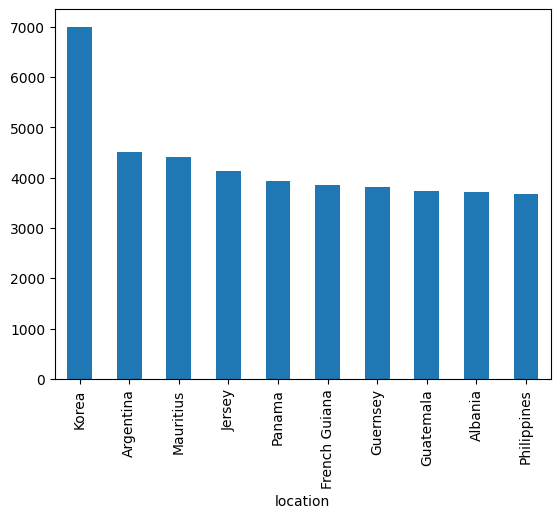

In [8]:
sales.index.value_counts().head(10).plot(kind= 'bar')


## Data cleaning

Check for missing data

In [9]:
sales.isna().sum()


customer_id        0
device_id          0
item_id            0
line_item_id       0
order_id           0
event_id           0
event_timestamp    0
quantity           0
currency           0
checked_out_at     0
status             0
dtype: int64

- No missing data in dataset

In [10]:
sales.duplicated().sum()

np.int64(0)

- no duplicated entries

#### Random Practices

In [11]:
print("Get customer data by ID")
sales[sales["customer_id"] == "56d7d069-2f58-4b35-9559-9405c45cae33"]


Get customer data by ID


,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,3,8229,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,4,8230,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,15,8231,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,2,8232,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,5,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,7,8233,7304d0f7-3f11-4261-851d-9b5238768976,38122,2024-03-25 03:22:27.265634,4,NGN,2024-03-30 04:07:11.699402,success
...,...,...,...,...,...,...,...,...,...,...,...
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,5,8235,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,1,8236,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,3,NGN,2024-03-30 04:07:11.699402,success
Brazil,56d7d069-2f58-4b35-9559-9405c45cae33,1857461e-852f-4c95-a412-bbc665f69dbd,12,8237,7304d0f7-3f11-4261-851d-9b5238768976,38149,2024-03-30 04:07:11.699402,1,NGN,2024-03-30 04:07:11.699402,success


In [12]:
print("Get customer data by location name")
sales.loc["Argentina"]

Get customer data by location name


,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Argentina,6a43e01f-4081-445b-b960-82b7f4599d8b,0a6776a5-af66-4f8d-b857-bfc66929f486,5,4205,16803a46-f73f-4c9c-a532-3772fdf323e3,19435,2024-03-23 17:59:17.738107,3,GBP,2024-03-30 04:08:10.700090,failed
Argentina,6a43e01f-4081-445b-b960-82b7f4599d8b,0a6776a5-af66-4f8d-b857-bfc66929f486,12,4206,16803a46-f73f-4c9c-a532-3772fdf323e3,19435,2024-03-23 17:59:17.738107,2,GBP,2024-03-30 04:08:10.700090,failed
Argentina,6a43e01f-4081-445b-b960-82b7f4599d8b,0a6776a5-af66-4f8d-b857-bfc66929f486,6,4207,16803a46-f73f-4c9c-a532-3772fdf323e3,19435,2024-03-23 17:59:17.738107,1,GBP,2024-03-30 04:08:10.700090,failed
Argentina,6a43e01f-4081-445b-b960-82b7f4599d8b,0a6776a5-af66-4f8d-b857-bfc66929f486,9,4208,16803a46-f73f-4c9c-a532-3772fdf323e3,19435,2024-03-23 17:59:17.738107,4,GBP,2024-03-30 04:08:10.700090,failed
Argentina,6a43e01f-4081-445b-b960-82b7f4599d8b,0a6776a5-af66-4f8d-b857-bfc66929f486,13,4209,16803a46-f73f-4c9c-a532-3772fdf323e3,19435,2024-03-23 17:59:17.738107,4,GBP,2024-03-30 04:08:10.700090,failed
...,...,...,...,...,...,...,...,...,...,...,...
Argentina,6d6c92dd-c109-4cae-94a2-d246f1aa0137,df51cfc4-8fd6-496e-b0d7-c74bd617598d,1,32048,f48b805a-4f39-494d-893c-a02bdeef2696,149002,2024-03-30 04:18:17.454573,3,USD,2024-03-30 04:18:17.454573,cancelled
Argentina,6d6c92dd-c109-4cae-94a2-d246f1aa0137,df51cfc4-8fd6-496e-b0d7-c74bd617598d,10,32049,f48b805a-4f39-494d-893c-a02bdeef2696,149002,2024-03-30 04:18:17.454573,5,USD,2024-03-30 04:18:17.454573,cancelled
Argentina,6d6c92dd-c109-4cae-94a2-d246f1aa0137,df51cfc4-8fd6-496e-b0d7-c74bd617598d,3,32050,f48b805a-4f39-494d-893c-a02bdeef2696,149002,2024-03-30 04:18:17.454573,4,USD,2024-03-30 04:18:17.454573,cancelled


In [13]:
print("Get total number of customers by id")
sales["customer_id"].nunique()


Get total number of customers by id


4594